In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\jean-\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (0.13.2)




[notice] A new release of pip is available: 23.3.2 -> 25.2
[notice] To update, run: C:\Users\jean-\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:

import os

import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
datapath = os.path.join('data', 'US', 'us_data.csv')
dus = pd.read_csv(datapath, index_col=0)

In [31]:
dus

,RPI,INDPRO,UNRATE,UEMP5TO14,PAYEMS,USGOOD,USCONS,MANEMP,DMANEMP,NDMANEMP,...,DCOILWTICO,FEDFUNDS,CURRCIR,BOGMBASE,WSHOSHO,WSHOTSL,T5YIE,T10YIE,log return gold,log return sp500
2003-04-01,0.004111,-0.006278,0.016807,0.035964,-0.000484,-0.003744,0.005246,-0.007706,-0.008612,-0.006242,...,-0.054781,0.007968,0.005315,0.006078,0.000906,0.000906,-0.01,0.02,-0.007018,0.012071
2003-04-02,0.004111,-0.006278,0.016807,0.035964,-0.000484,-0.003744,0.005246,-0.007706,-0.008612,-0.006242,...,-0.032055,0.007968,0.005315,0.006078,0.000906,0.000906,0.02,0.01,-0.015396,0.025781
2003-04-03,0.004111,-0.006278,0.016807,0.035964,-0.000484,-0.003744,0.005246,-0.007706,-0.008612,-0.006242,...,0.017362,0.007968,0.005315,0.006078,0.000906,0.000906,-0.02,-0.02,-0.014099,-0.005064
2003-04-04,0.004111,-0.006278,0.016807,0.035964,-0.000484,-0.003744,0.005246,-0.007706,-0.008612,-0.006242,...,-0.022277,0.007968,0.005315,0.006078,0.000906,0.000906,-0.01,-0.01,0.000983,0.002735
2003-04-07,0.004111,-0.006278,0.016807,0.035964,-0.000484,-0.003744,0.005246,-0.007706,-0.008612,-0.006242,...,-0.023145,0.007968,0.005315,0.006078,0.000906,0.000906,-0.02,0.02,-0.008324,0.001228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.001065,0.010677,-0.024098,-0.032515,0.002034,0.000185,0.001811,-0.000783,-0.001895,0.001031,...,0.019520,-0.035091,0.001086,-0.002210,-0.001087,-0.001610,0.01,0.03,0.000103,0.010982
2024-12-26,0.001065,0.010677,-0.024098,-0.032515,0.002034,0.000185,0.001811,-0.000783,-0.001895,0.001031,...,0.019520,-0.035091,0.001086,-0.002210,-0.000479,0.000039,0.01,0.03,0.008091,-0.000406
2024-12-27,0.001065,0.010677,-0.024098,-0.032515,0.002034,0.000185,0.001811,-0.000783,-0.001895,0.001031,...,0.012707,-0.035091,0.001086,-0.002210,-0.000479,0.000039,-0.01,-0.01,-0.005493,-0.011117
2024-12-30,0.001065,0.010677,-0.024098,-0.032515,0.002034,0.000185,0.001811,-0.000783,-0.001895,0.001031,...,0.006293,-0.035091,0.001086,-0.002210,-0.000479,0.000039,-0.03,-0.03,-0.005592,-0.010760


In [32]:
cols_inf = dus.columns[np.isinf(dus.to_numpy()).any(axis=0)]
print(cols_inf)

Index([], dtype='object')


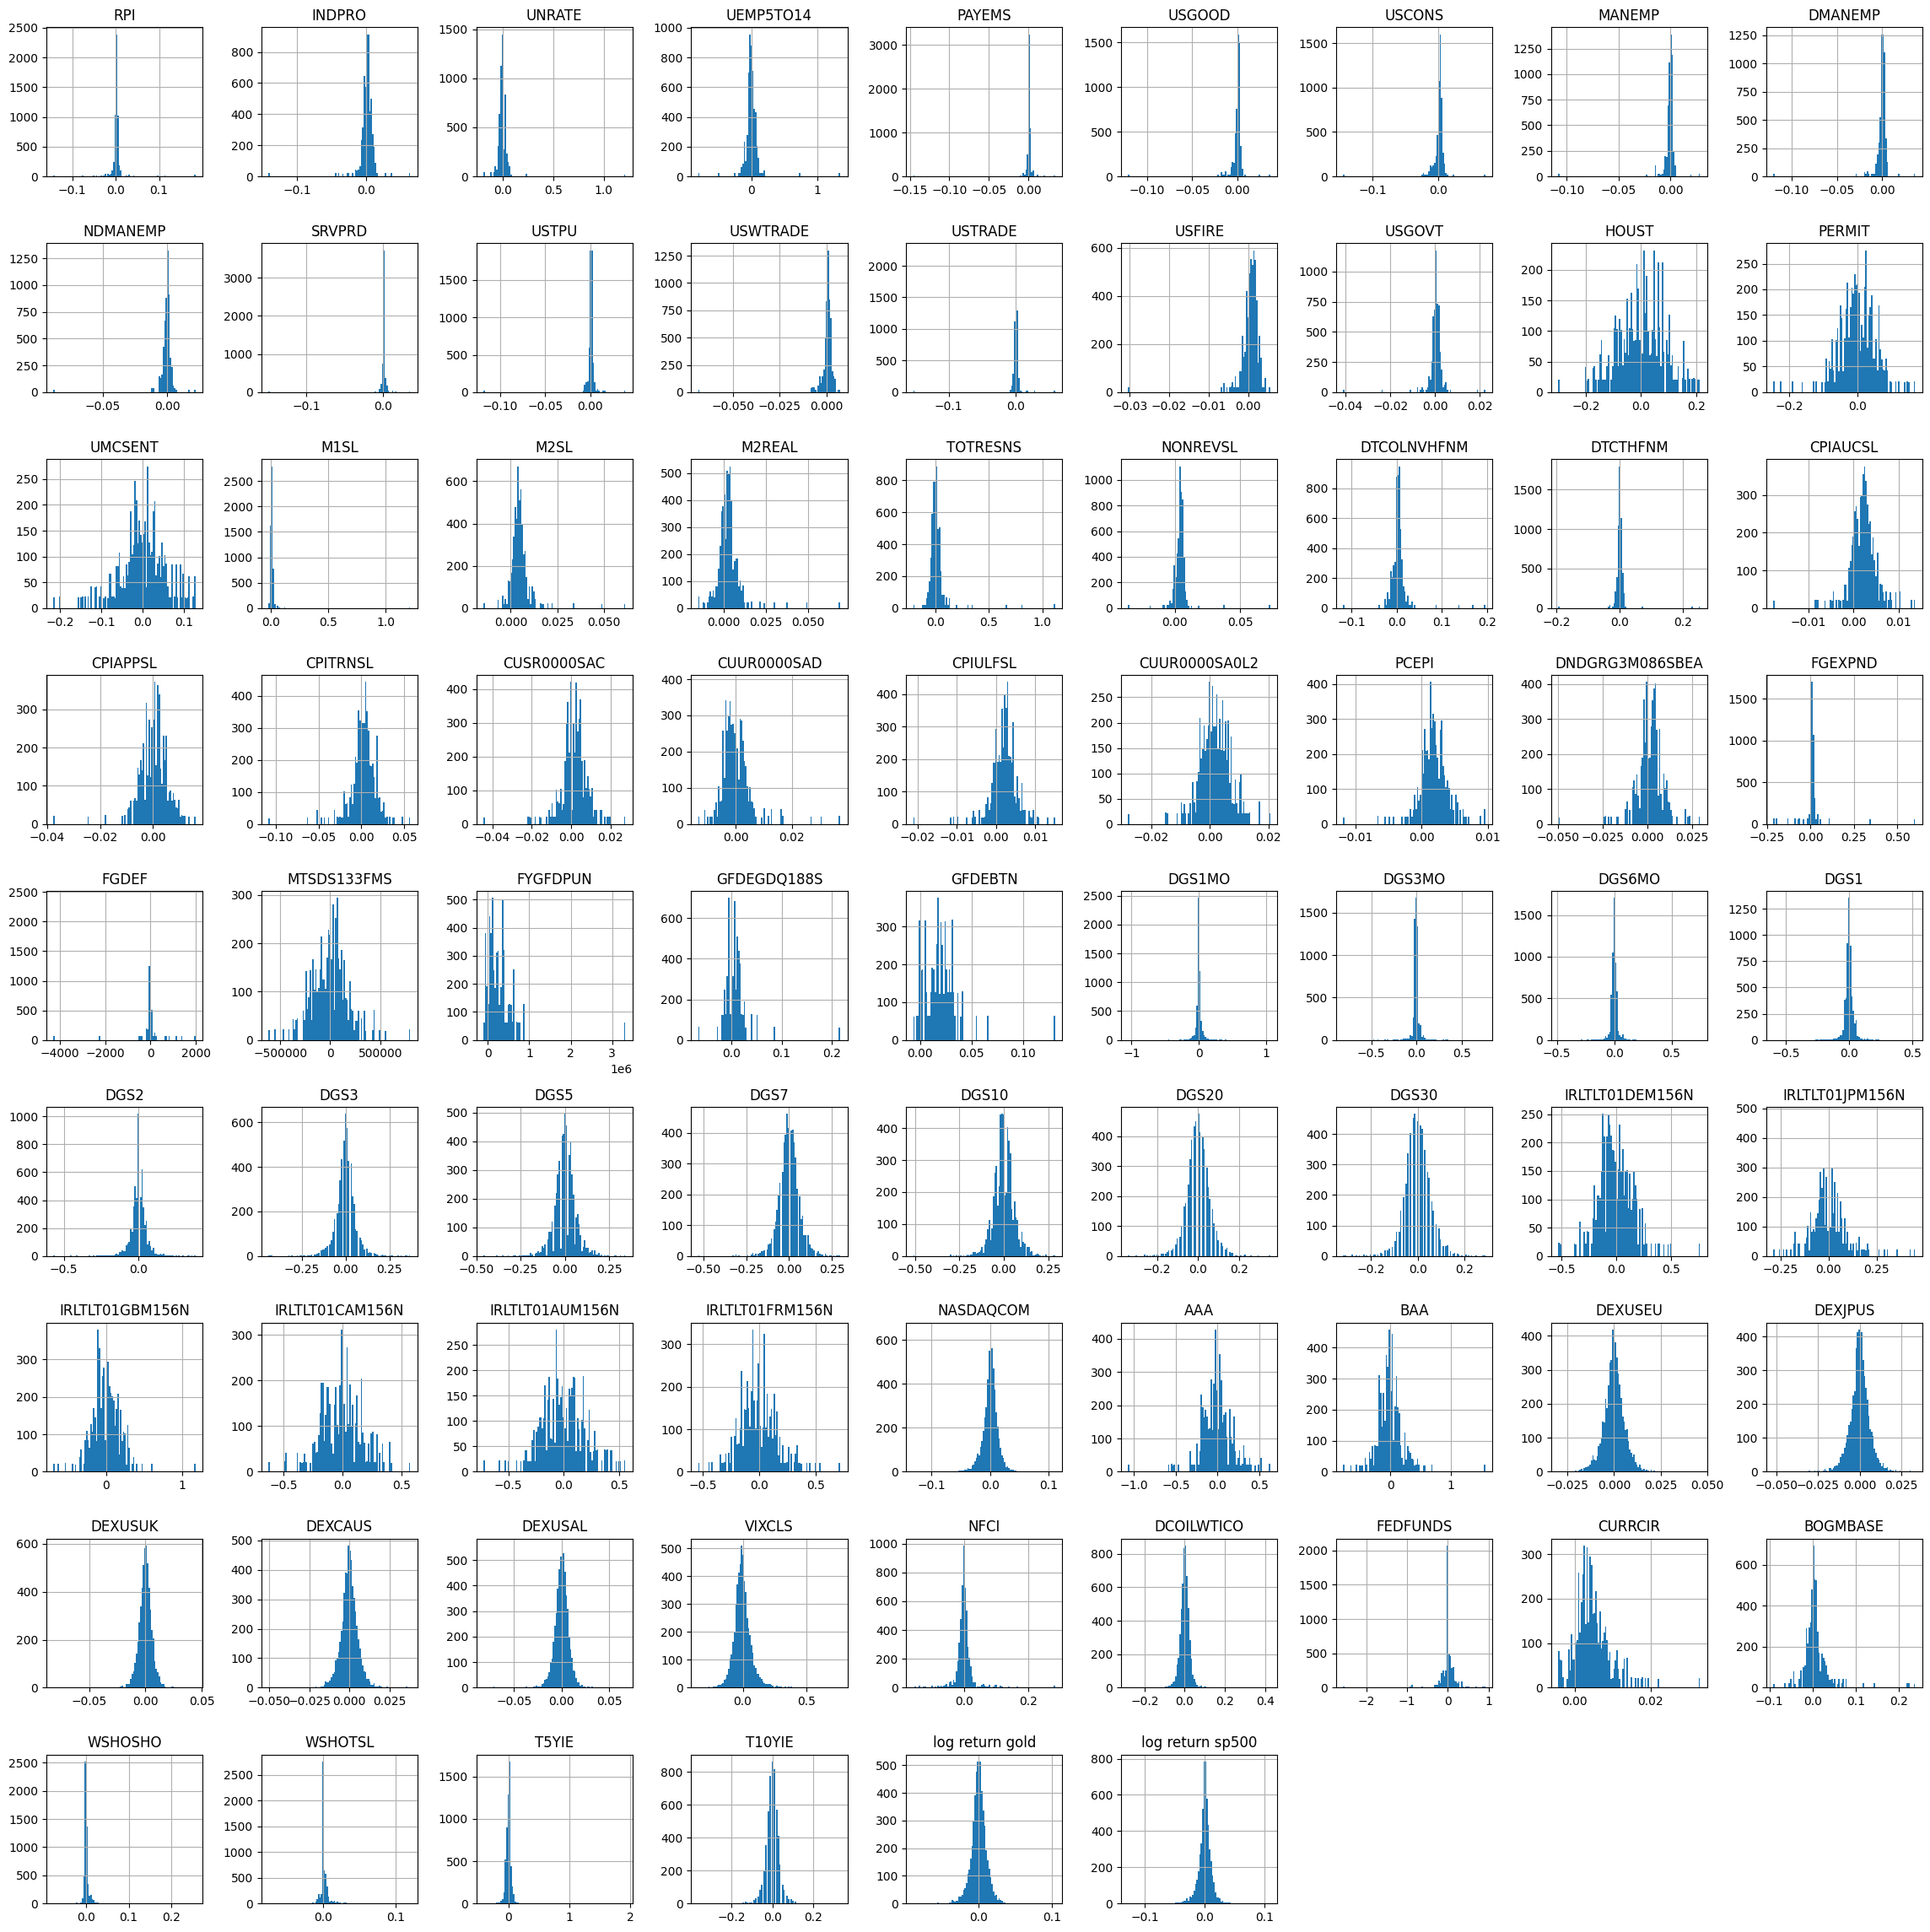

In [33]:
dus.hist(figsize=(23, 23), bins=100)
plt.tight_layout()

In [34]:
labels = pd.to_datetime(dus.index).strftime('%Y-%m')

In [35]:
labels.unique()

Index(['2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09',
       '2003-10', '2003-11', '2003-12', '2004-01',
       ...
       '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08',
       '2024-09', '2024-10', '2024-11', '2024-12'],
      dtype='object', length=261)

Let's check again that data looks stationary:

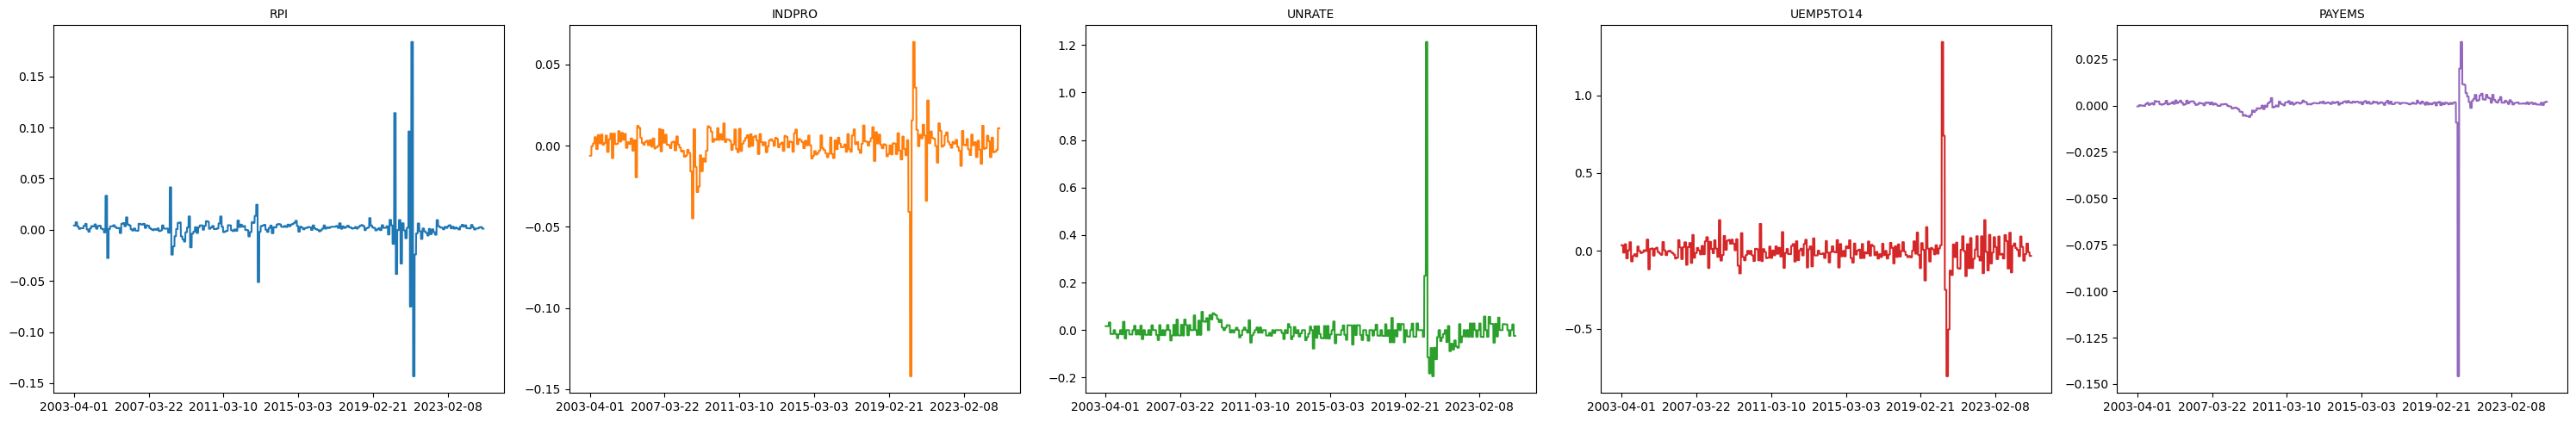

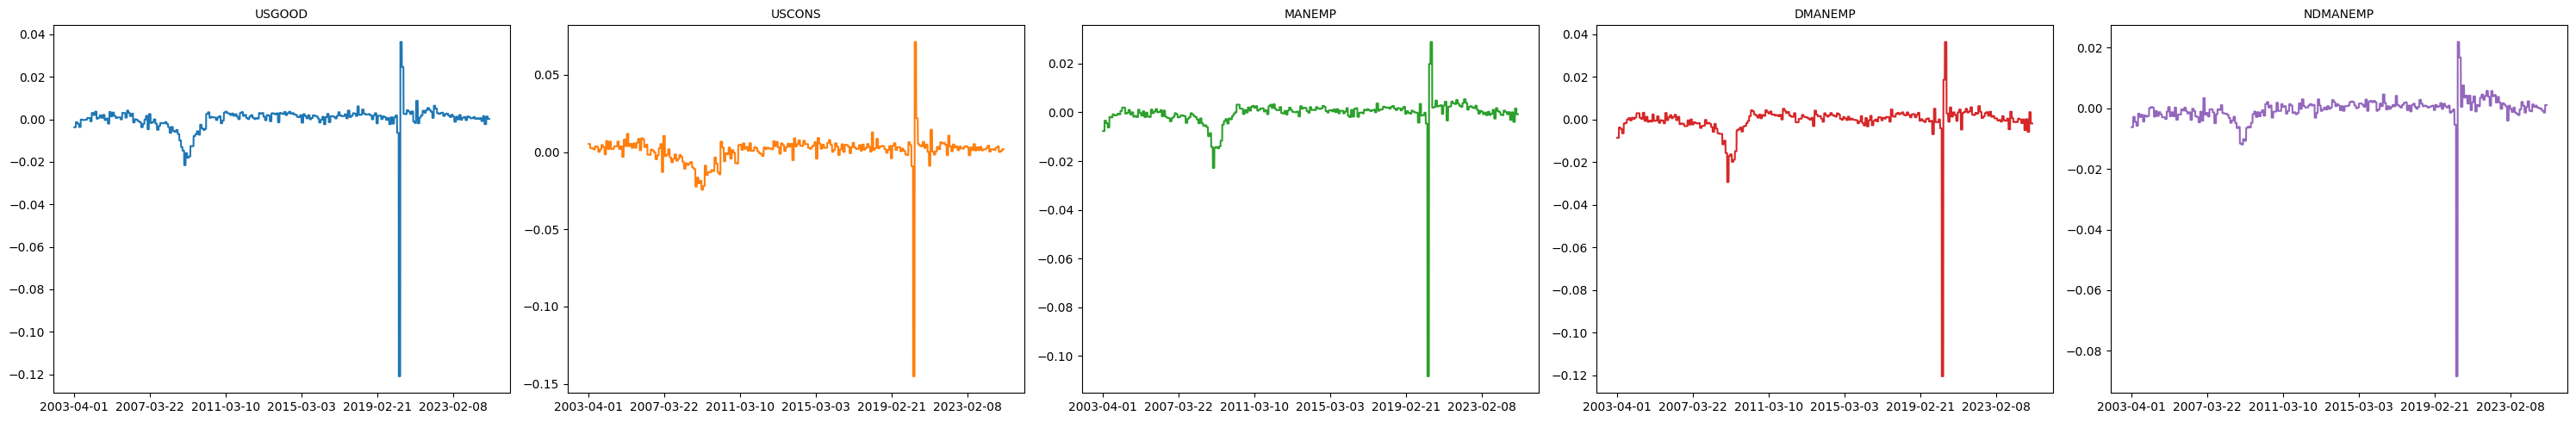

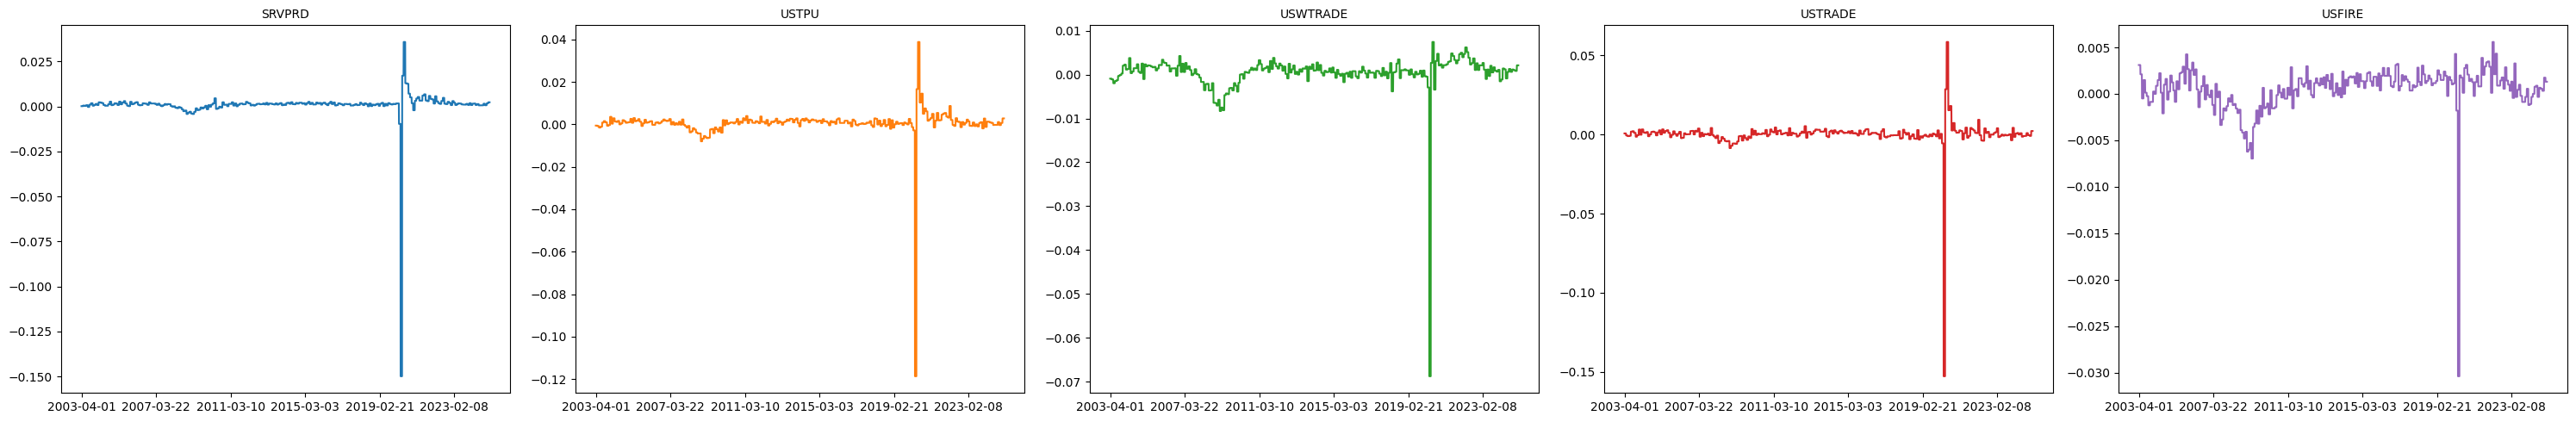

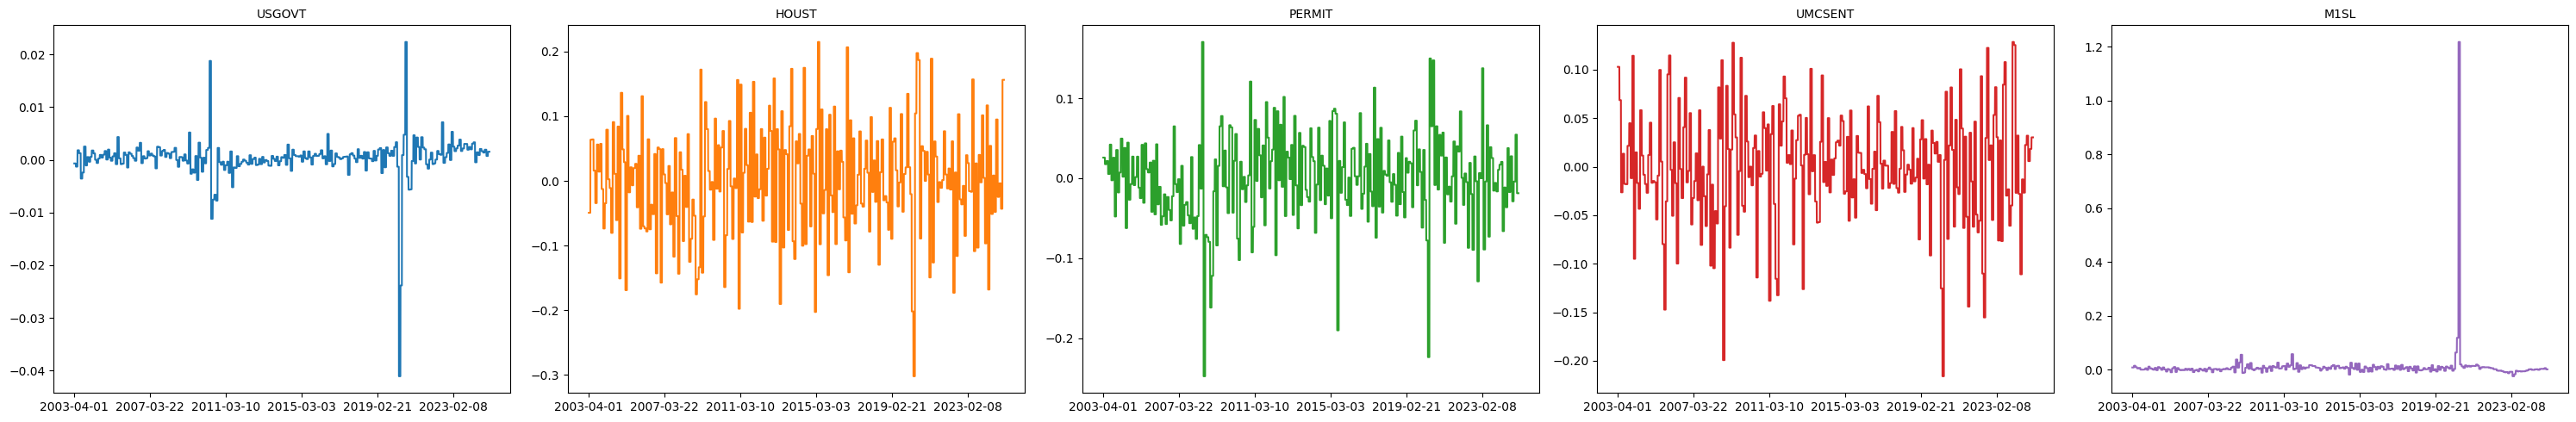

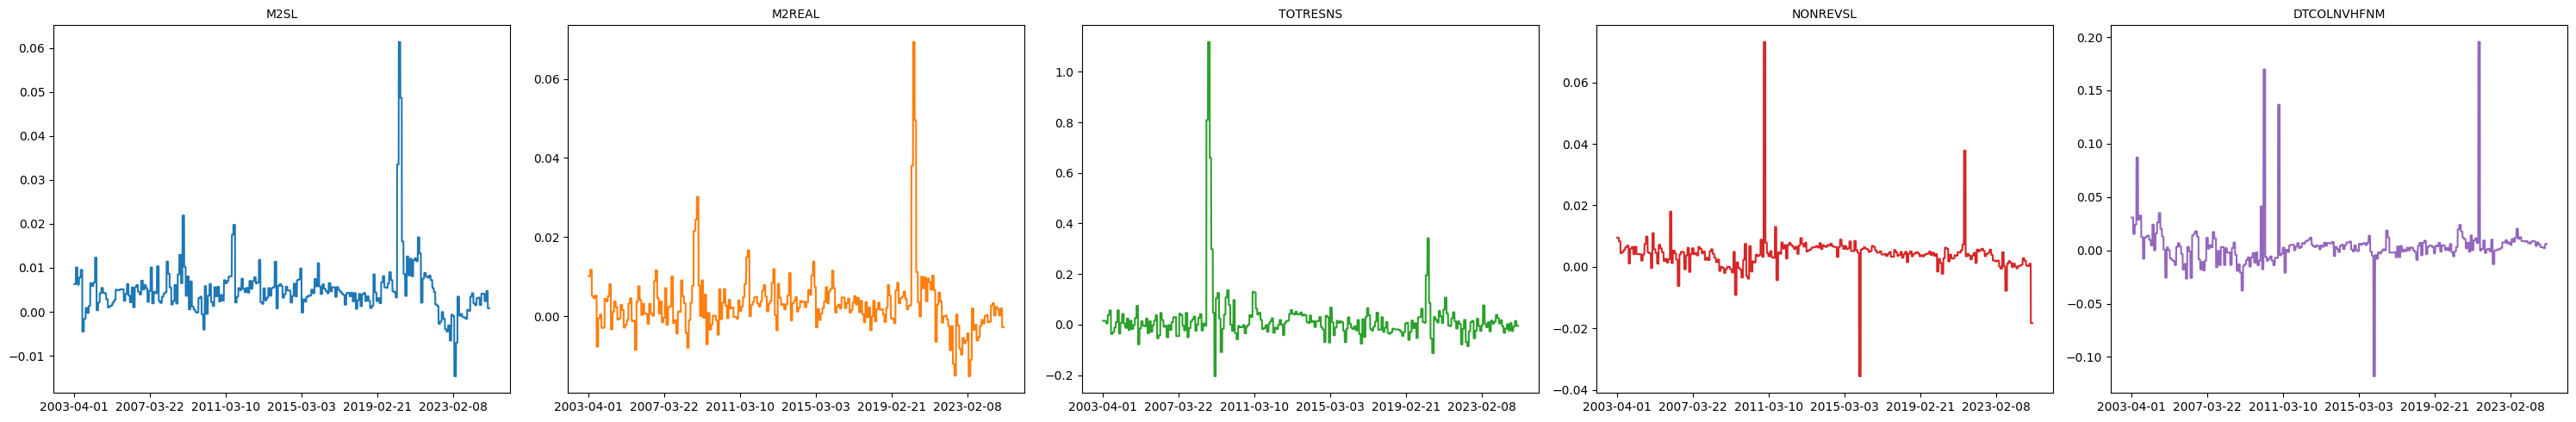

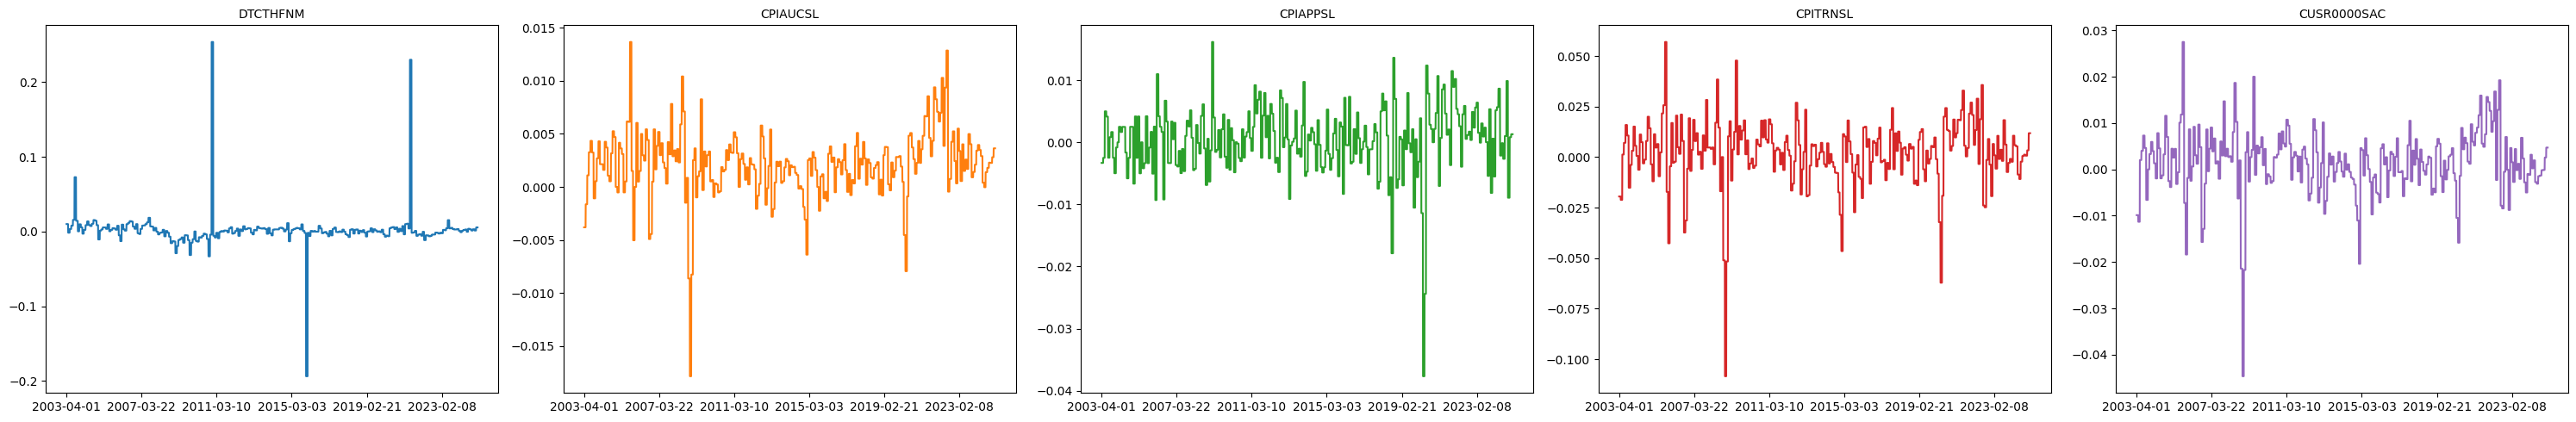

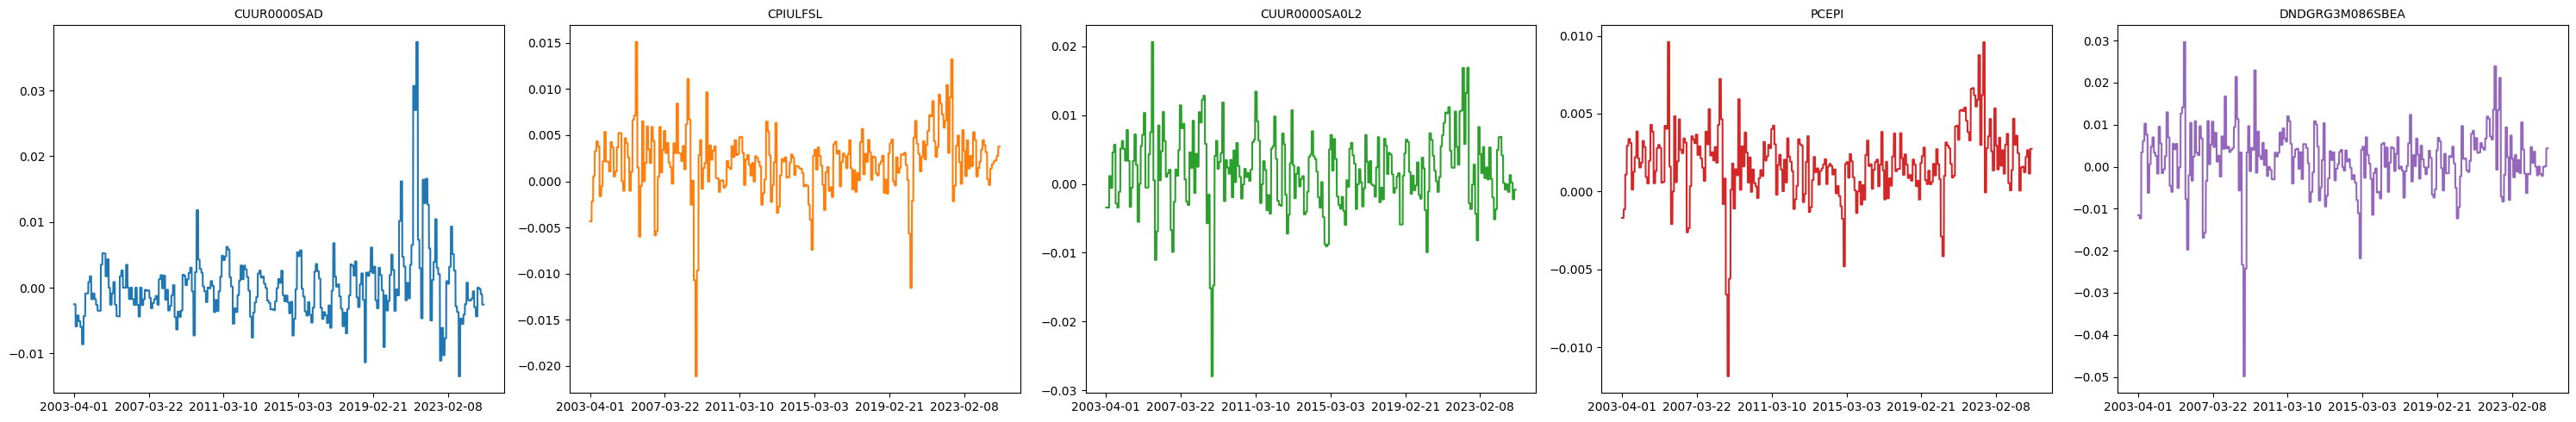

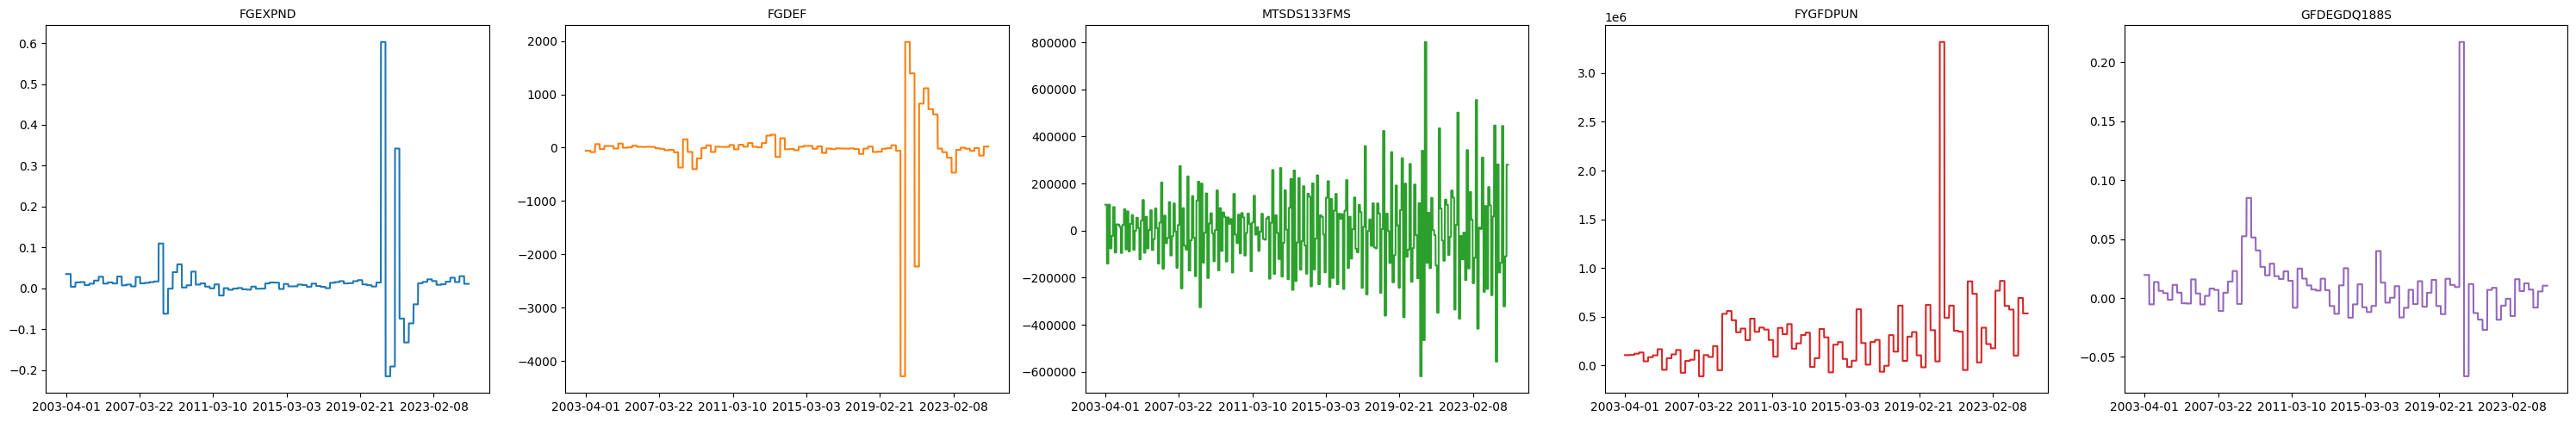

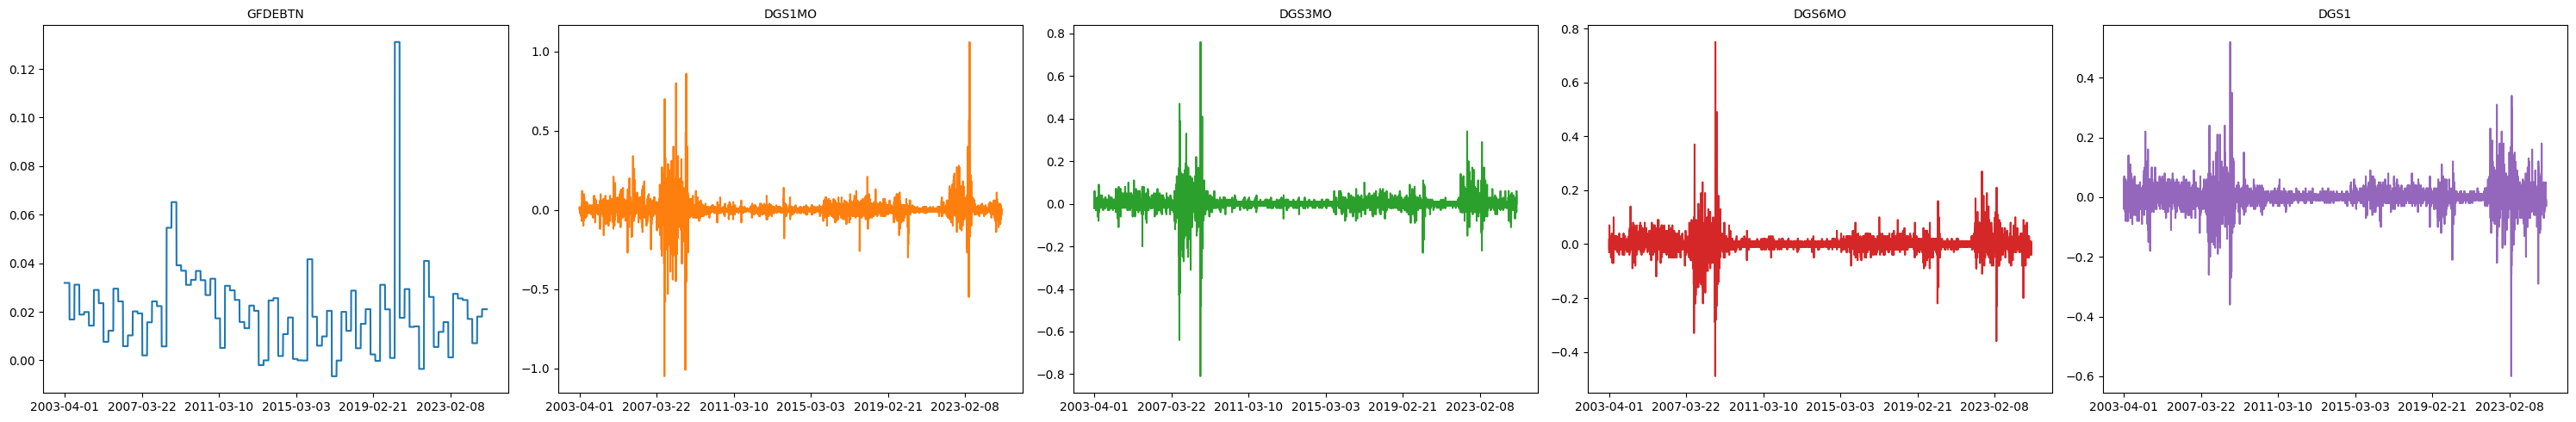

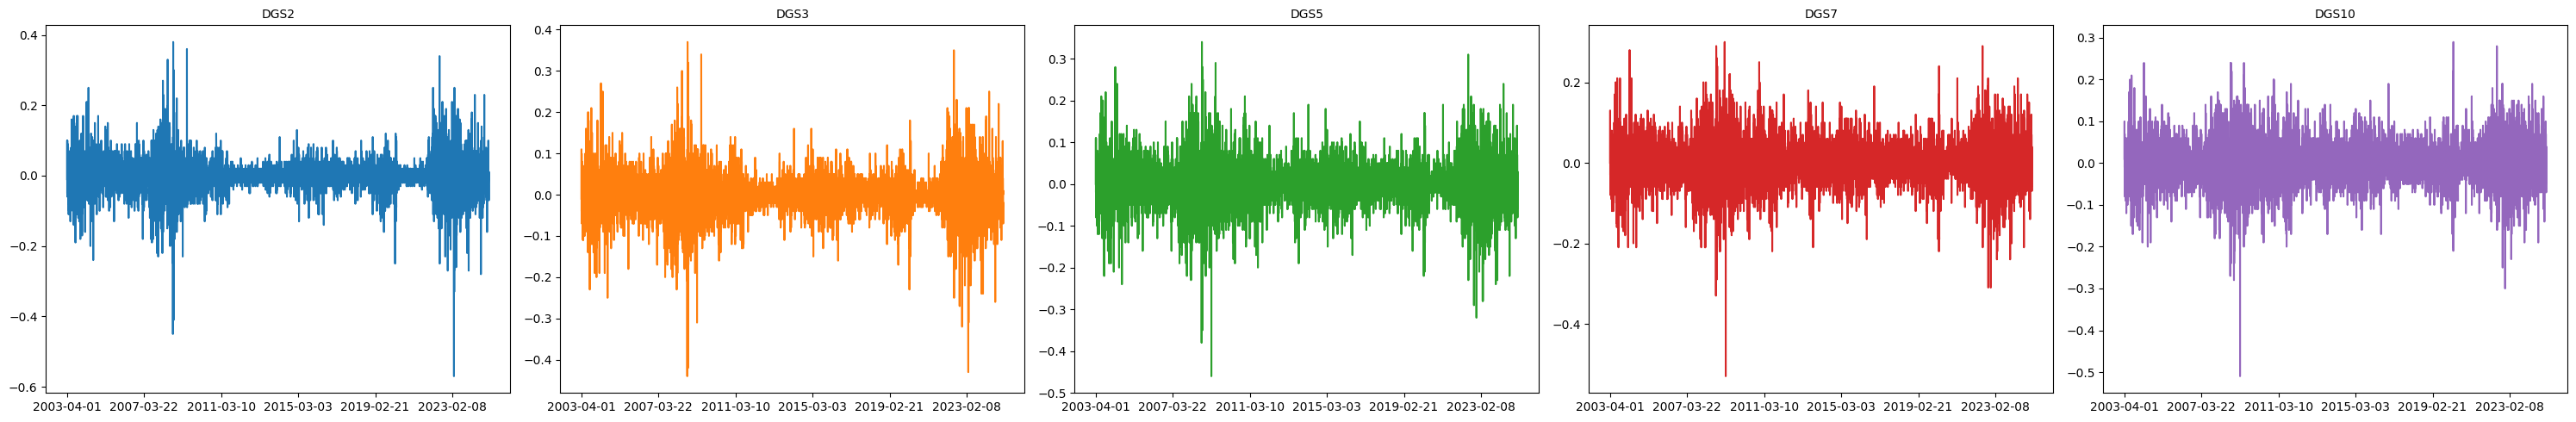

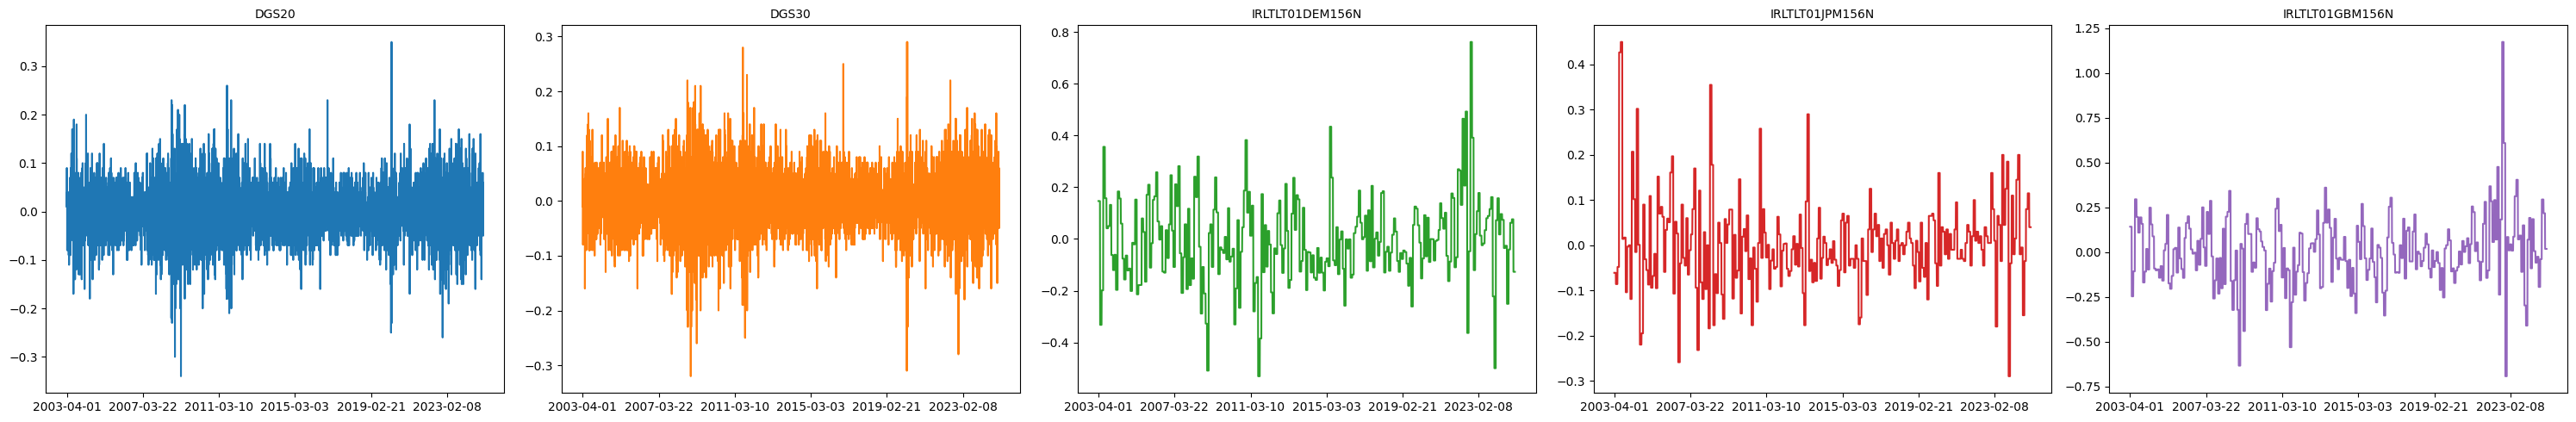

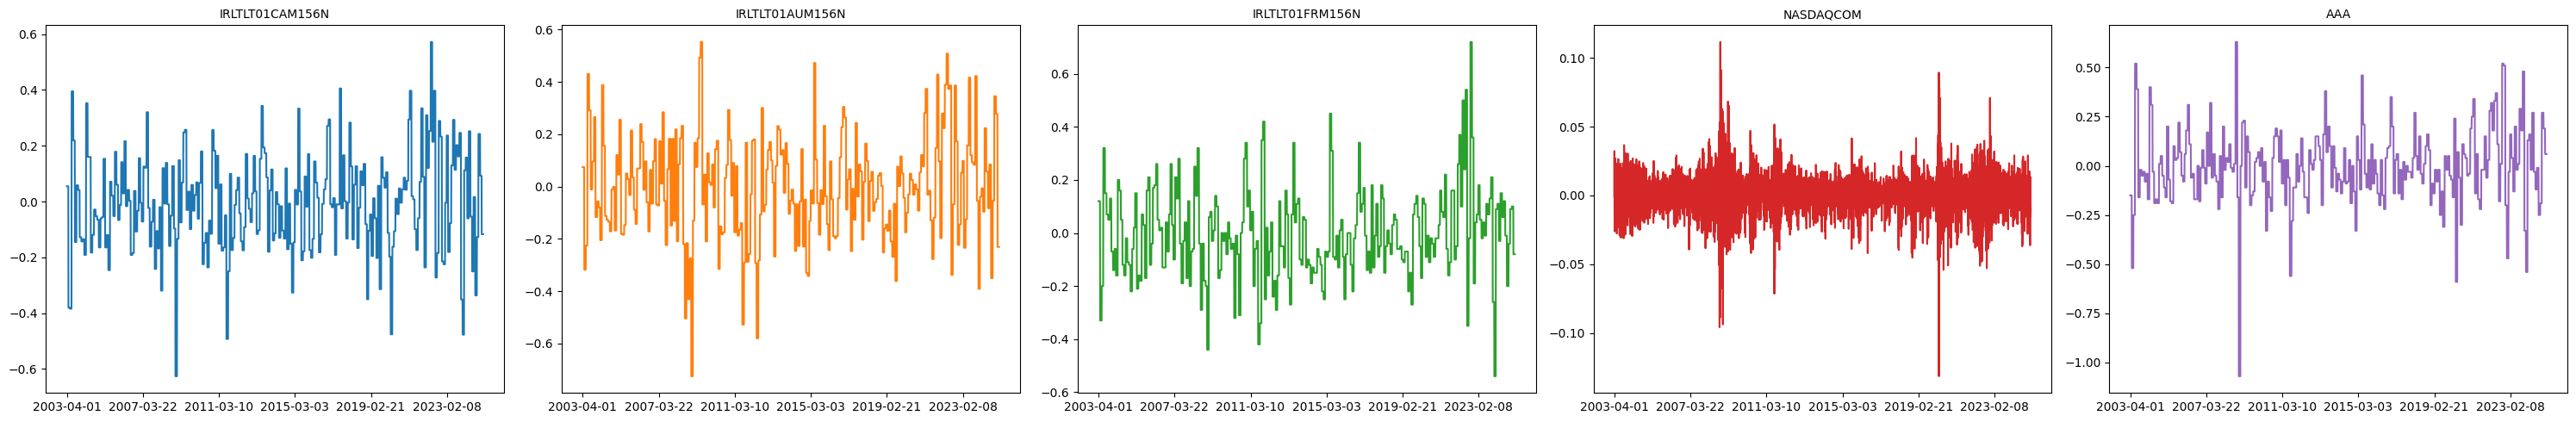

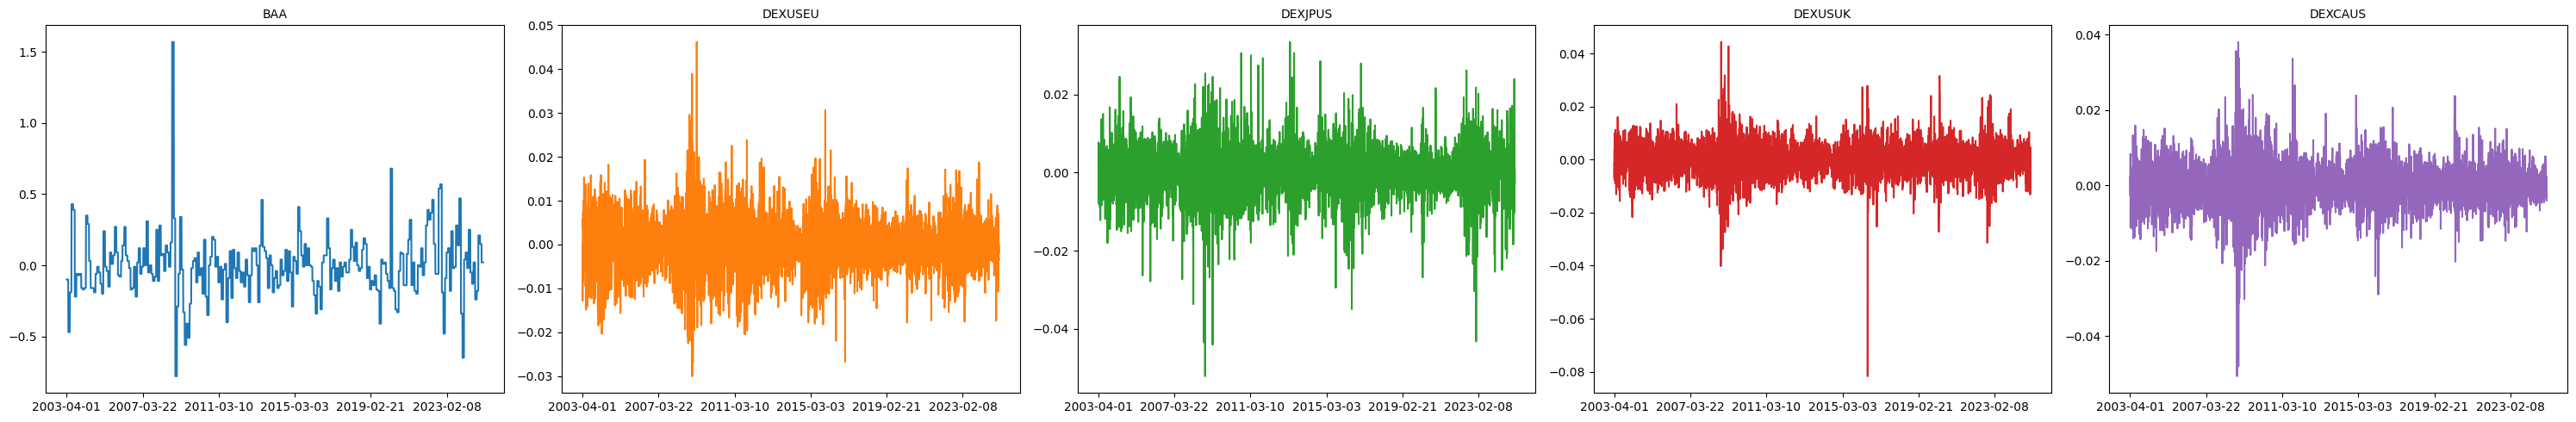

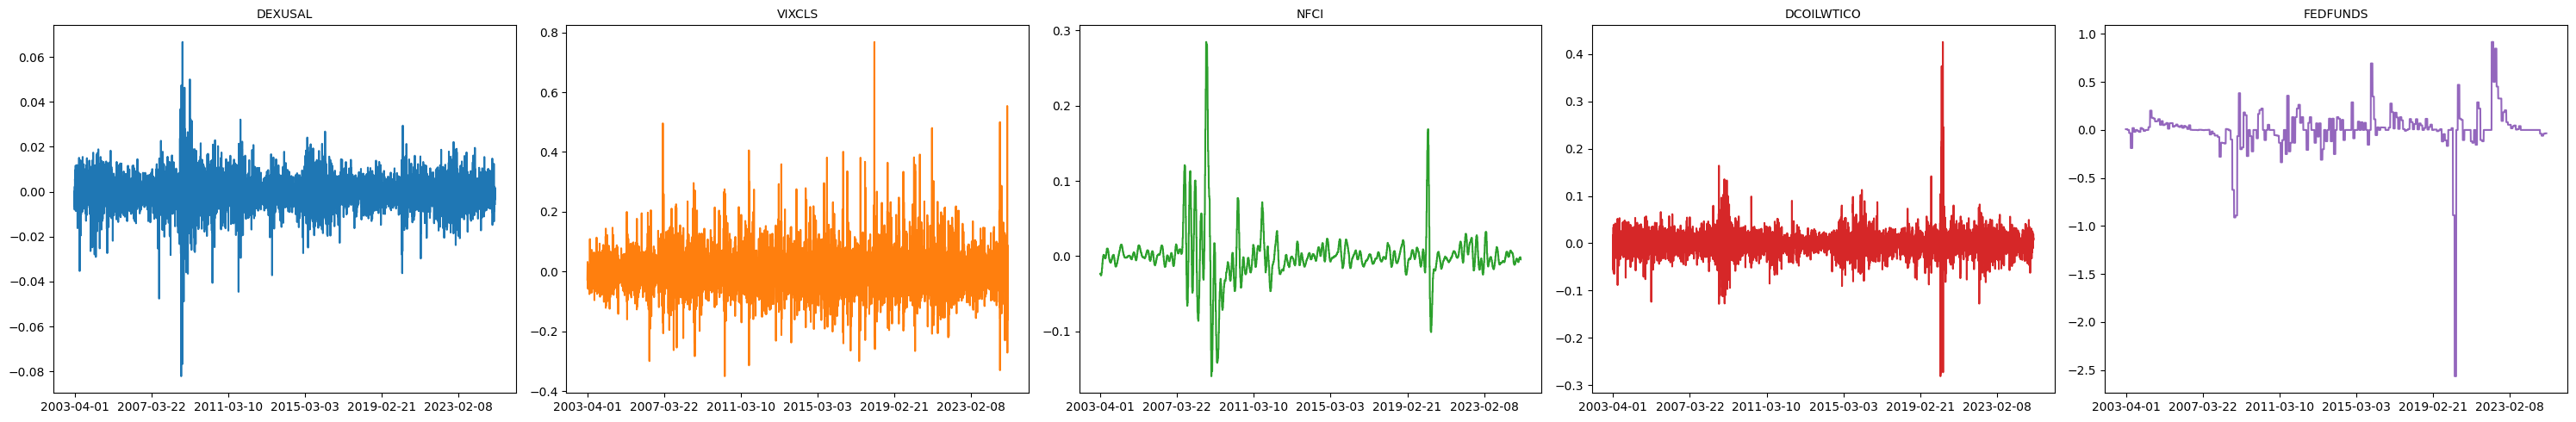

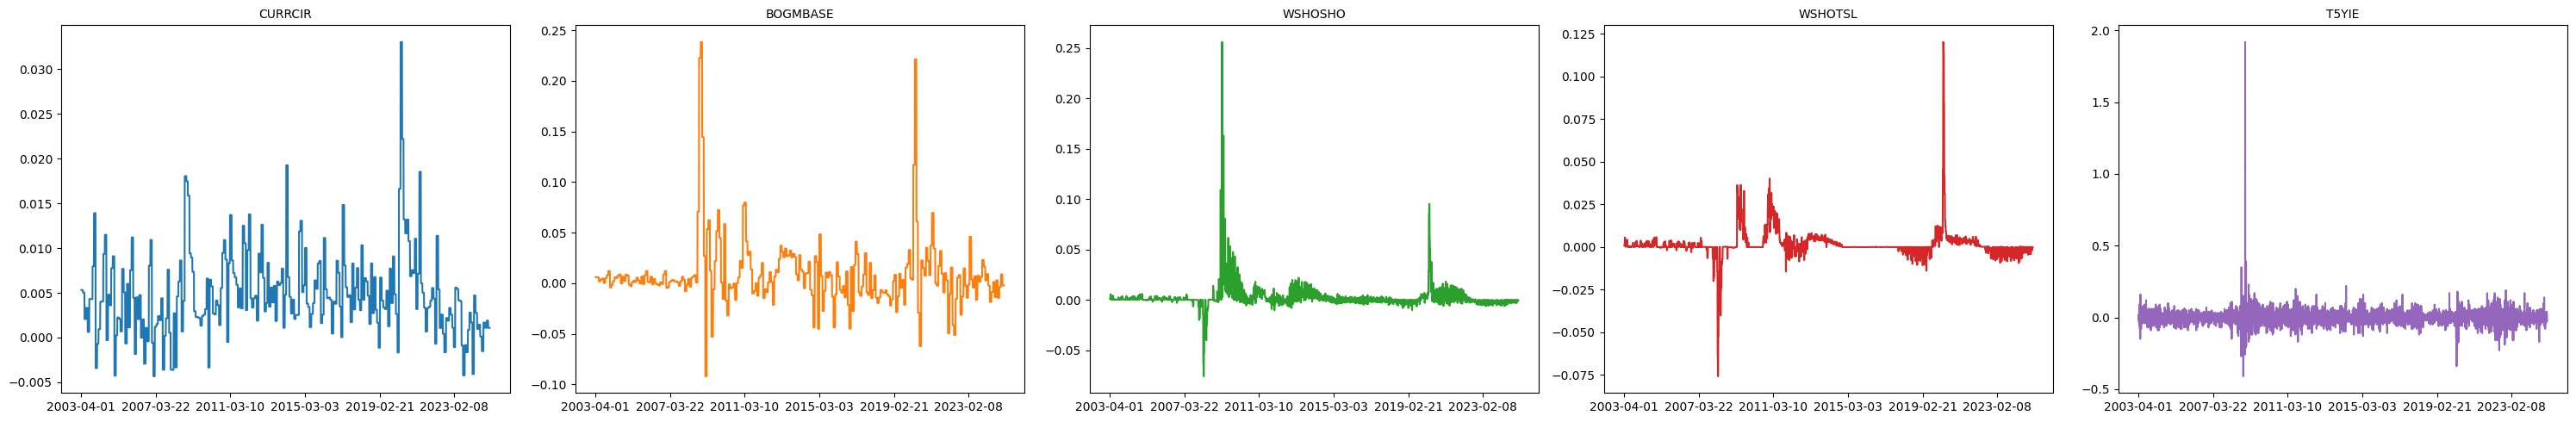

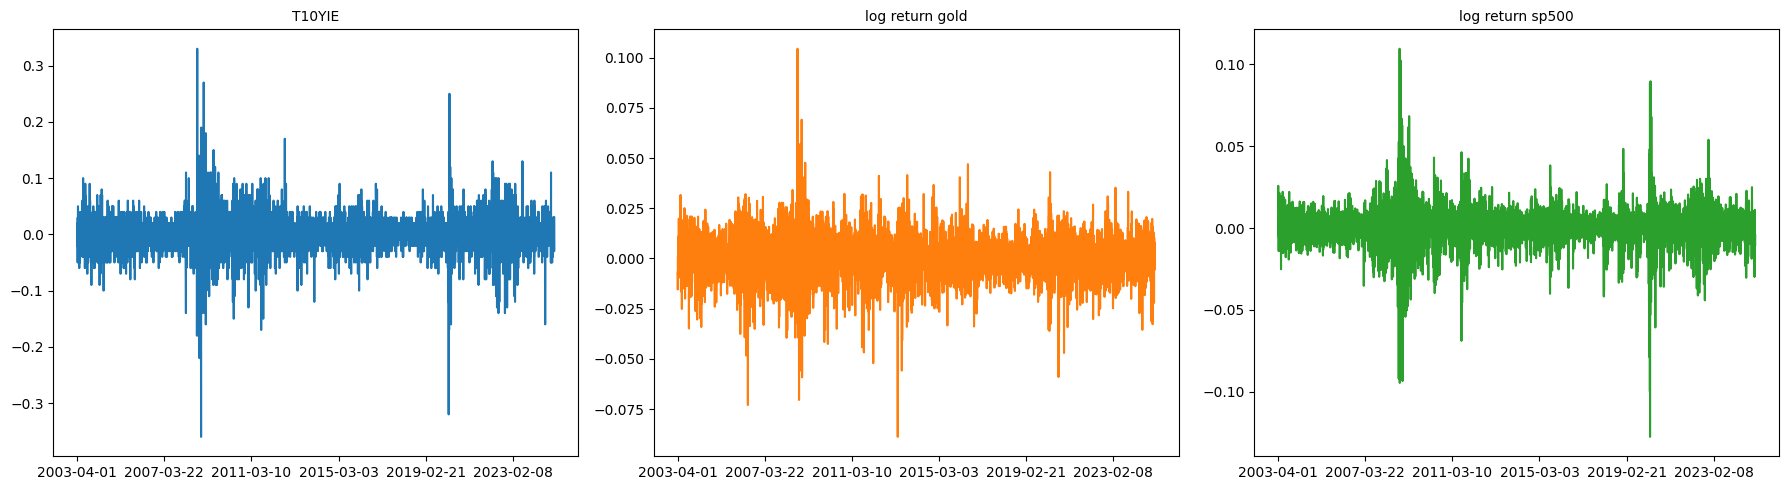

In [37]:
 
n_figs = int(dus.shape[1]/5) +1

for i in range(n_figs):
    subset = dus.iloc[:, i*5 : (i+1)*5]
    axes = subset.plot(subplots=True, layout=(1,5), figsize=(30,5), legend=False)

    # si pandas renvoie une liste (cas 1D), convertir en tableau
    axes = np.array(axes).flatten()
    
    for ax, col in zip(axes, subset.columns):
        ax.set_title(col, fontsize=10)
    
    # masquer cases vides si < 9 séries dans la figure
    for ax in axes[len(subset.columns):]:
        ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()


We can check correlation within features:

A few preliminary remarks:
- PAYEMS = NFP variable is very highly correlated to USGOOD,..., USGOVT which is the breakdown of NFP per economic sector. These are very redundant and not correlated at all with the yields so we will remove the breakdown per sector and keep only 'PAYEMS'. 


<Axes: >

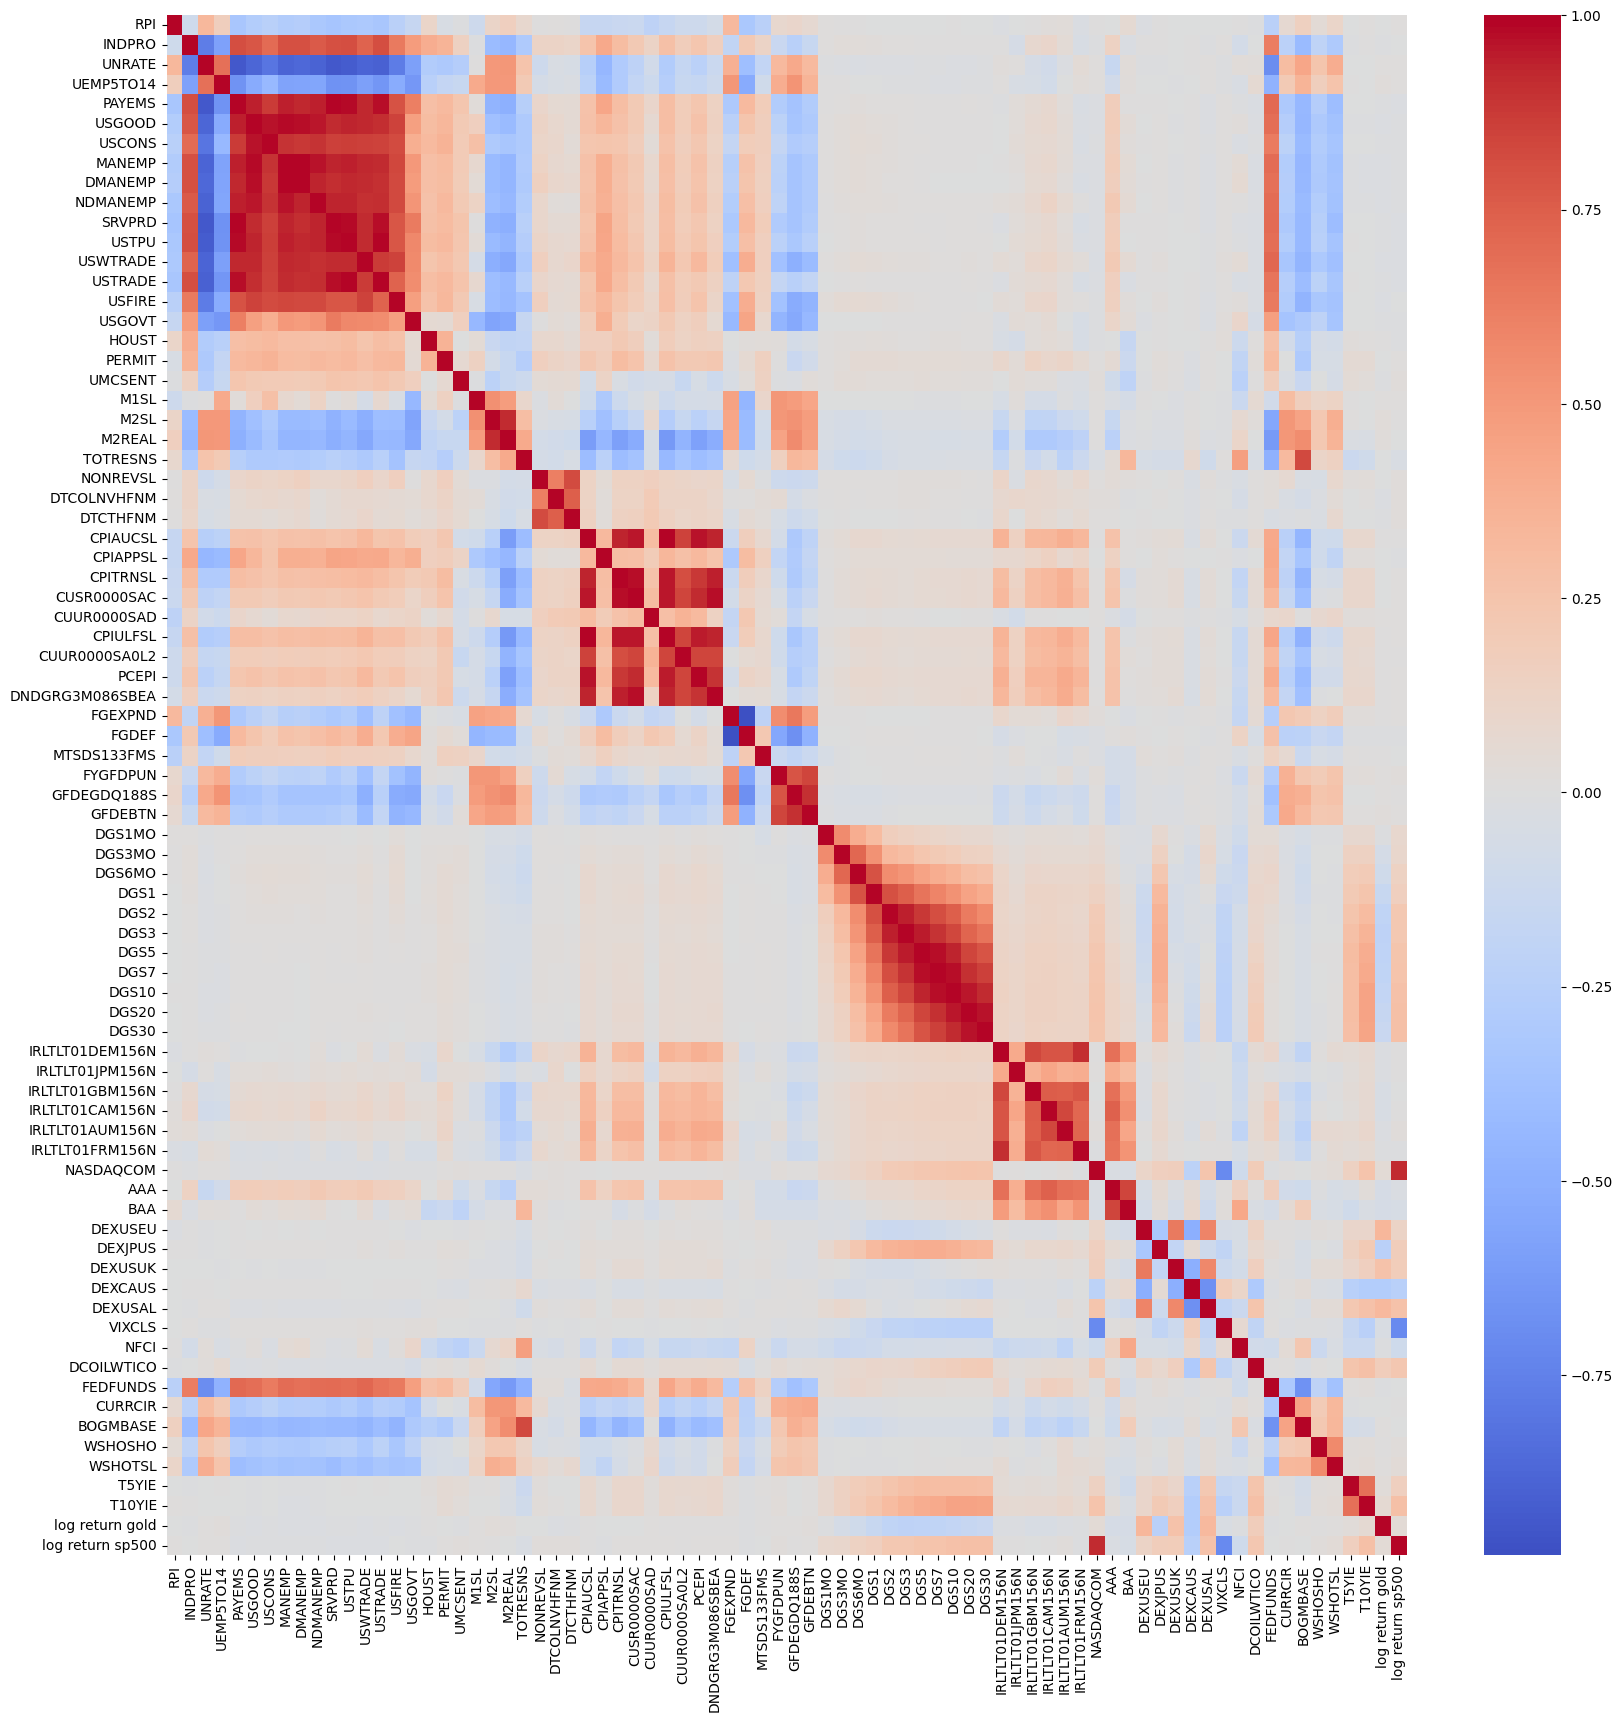

In [42]:
plt.figure(figsize = (20,20))
sns.heatmap(dus.corr(), cmap='coolwarm', center=0)

In [ ]:
dus.describe()

,RPI,INDPRO,UNRATE,UEMP5TO14,UEMP27OV,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,...,WSHOBL,T5YIE,T10YIE,XAU_USD,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx
count,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,...,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000,5538.000000
mean,15728.405273,98.152828,5.815005,2503.807512,2589.488263,140821.976706,20371.986457,646.737107,6902.323944,12770.166847,...,130705.759661,1.931231,2.091369,1252.075417,0.000474,0.000394,0.000547,0.000464,0.000414,2235.283178
std,2486.144034,4.617676,2.037773,1130.174543,1662.620066,8499.518721,1464.632172,97.588495,808.761954,903.768371,...,133818.167511,0.571097,0.401029,533.298157,0.011776,0.011774,0.011086,0.011086,0.011832,1274.110071
min,11991.075000,84.674600,3.400000,1525.000000,910.000000,129705.000000,17613.000000,491.100000,5427.000000,11382.000000,...,0.000000,-2.240000,0.040000,323.000000,-0.118168,-0.118218,-0.107631,-0.107768,-0.119841,676.530000
25%,13779.884000,95.515775,4.200000,1990.000000,1338.000000,133519.000000,19240.000000,579.700000,6246.250000,12086.000000,...,0.000000,1.620000,1.840000,877.250000,-0.004192,-0.004259,-0.004319,-0.004392,-0.004136,1241.507500
50%,14962.471000,99.049200,5.100000,2296.000000,1847.000000,138177.000000,20579.000000,635.900000,7037.500000,12576.000000,...,18423.000000,1.970000,2.190000,1268.850000,0.000810,0.000733,0.001132,0.001045,0.000721,1805.450000
75%,17701.297000,101.942100,6.900000,2765.500000,3704.000000,147660.000000,21671.000000,703.500000,7533.000000,13419.000000,...,267019.000000,2.320000,2.360000,1664.050000,0.005826,0.005743,0.005961,0.005906,0.005714,2888.142500
max,22918.422000,104.103800,14.800000,14806.000000,6800.000000,158942.000000,22627.000000,851.700000,8289.000000,14867.000000,...,326044.000000,3.590000,3.020000,2786.190000,0.114918,0.114856,0.107422,0.107335,0.115800,6090.270000


In [ ]:
print(dus.shape)
n_rows = dus.shape[0]
test_size = 0.8
dus_train, dus_test = dus.iloc[:int(test_size * n_rows)], dus.iloc[int(test_size * n_rows):]

(5538, 101)


In [ ]:
dus_train.describe()

,RPI,INDPRO,UNRATE,UEMP5TO14,UEMP27OV,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,...,WSHOBL,T5YIE,T10YIE,XAU_USD,vwretd,vwretx,ewretd,ewretx,sprtrn,spindx
count,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,...,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000,4430.000000
mean,14771.800435,97.342642,6.155734,2642.268623,2751.200903,137988.711287,20204.195260,668.752709,6676.968172,12803.558465,...,93030.617607,1.818926,2.038716,1071.046088,0.000453,0.000369,0.000591,0.000508,0.000376,1687.373361
std,1741.761028,4.706170,2.060312,1217.034438,1747.539591,6540.032100,1562.797429,95.819169,732.869846,997.454375,...,120880.543749,0.553967,0.414672,417.703957,0.012084,0.012083,0.011239,0.011239,0.012156,649.589543
min,11991.075000,84.674600,3.500000,1550.000000,910.000000,129705.000000,17613.000000,498.000000,5427.000000,11382.000000,...,0.000000,-2.240000,0.040000,323.000000,-0.118168,-0.118218,-0.107631,-0.107768,-0.119841,676.530000
25%,13547.935000,93.735300,4.700000,2163.000000,1372.000000,132431.000000,18737.000000,610.100000,5932.000000,11978.000000,...,0.000000,1.560000,1.790000,668.562500,-0.004081,-0.004184,-0.004037,-0.004083,-0.004006,1188.335000
50%,14386.123000,98.682600,5.500000,2377.000000,1929.000000,136762.000000,20029.000000,665.200000,6796.000000,12390.000000,...,18423.000000,1.845000,2.120000,1202.495000,0.000840,0.000767,0.001237,0.001165,0.000708,1416.065000
75%,16090.905000,101.249300,7.700000,2859.000000,4042.000000,142808.000000,21798.500000,728.500000,7347.000000,13922.000000,...,245266.000000,2.180000,2.340000,1331.352500,0.005654,0.005565,0.005751,0.005642,0.005514,2099.297500
max,19985.052000,104.103800,14.800000,14806.000000,6800.000000,152292.000000,22627.000000,851.700000,7726.000000,14867.000000,...,326044.000000,2.940000,2.760000,2040.400000,0.114918,0.114856,0.107422,0.107335,0.115800,3386.150000


In [ ]:
rho = dus_train.corr()


In [ ]:
high_correlations = rho[abs(rho) >= 0.7]
low_correlations = rho[abs(rho) <= 0.1]

In [ ]:
(-high_correlations.isna()).sum().sum() - high_correlations.shape[0]

np.int64(3030)

In [ ]:
high_correlations.size

10201

In [ ]:
&